### Display log results

In [ ]:
''' Demonstrate the usage of tensors, graphs, and sessions '''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

# Step 1: Create two variables and an operation that adds them together
v1 = tf.Variable(2)
v2 = tf.Variable(3)
v3 = v1 + v2

# Step 2: Obtain an operation that initializes the two variables
init = tf.global_variables_initializer()

# Step 3: Execute the initialization operation in a session
with tf.Session() as sess:
    sess.run(init)

# Step 4: Execute the addition operation in a session
    result = sess.run(v3)

# Step 5: Print the result of the addition to the log
    tf.logging.set_verbosity(tf.logging.INFO)
    tf.logging.info('Result: {0}'.format(result))

# End    
sess.close()    

------

## Using Optimizers (loss)

### Training Goal

The goal of training is to update a model's variables so that the model will resemble the system as closely as possible. The difference between the model and the system is called loss and if training is working properly, the loss will decrease with each training step. 

Researchers have devised many algorithms for minimizing loss and TensorFlow represents these methods with subclasses of the Optimizer class. No matter which method you select the overall process of using optimizers is straight forward. 

### Steps
First, you need to create an instance of the Optimizer class and call the Optimizer's minimize method with your expression for the loss. Minimize returns an operation that performs a single update to the variables in the loss. 

Once you have the Optimizer's operation you can begin the training process. One method of training is to execute the operation in a session until the loss reaches an acceptably low level.

### Gradient Descent

The goal of optimization is to compute the variables for the next training step, and this set of variables is given as theta sub i plus one. 

The Gradient Descent Method computes this by finding the gradient of the loss, multiplying it by the learning rate, and subtracting this from the current set of variables, theta sub i. 

In [ ]:
from PIL import Image
Image.open('Images/15-gradient-descent.png')

The learning rate is chosen by the developer and selecting this variable is an important decision. If the learning rate is too large the algorithm will take large steps down the mountain and it may step around the minimum or never reach the minimum at all. 

If the learning rate is too small, the algorithm will step more precisely but it will take much more time to reach the bottom. This learning rate value can be confusing, so here's an analogy. 

If minimizing loss is like descending a mountain, then setting the learning rate is like wearing stilts. Setting a high learning rate is like wearing long stilts. 

You'll descend the mountain faster but you can't step precisely and you may miss the bottom. Setting a low learning rate is like wearing short stilts. You may step more precisely but it may take a longer time to descend.

### Optimizer Example

In [19]:
''' Demonstrate how optimizers are used '''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

# Define constants
learn_rate = 0.2 # arbitrary; most learning rates are 0.001 but it will not find the global min because of 100 steps
num_steps = 100

# Step 1: Define the loss function
x = tf.Variable(0.0)
loss = tf.pow(x, 2) - 4.0 * x + 5.0

# Step 2: Create an optimizer to minimize the loss
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(loss)

# Step 3: Execute the optimizer in a session
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for _ in range(num_steps):
        _, loss_val, x_val = sess.run([optimizer, loss, x])
        
# Step 4: Print the values of x and the loss to the log
    tf.logging.set_verbosity(tf.logging.INFO)
    str = 'x is {0} and the loss is {1}'.format(x_val, loss_val)
    tf.logging.info(str)
    
# End    
sess.close()       

INFO:tensorflow:x is 1.943171739578247 and the loss is 1.0032293796539307


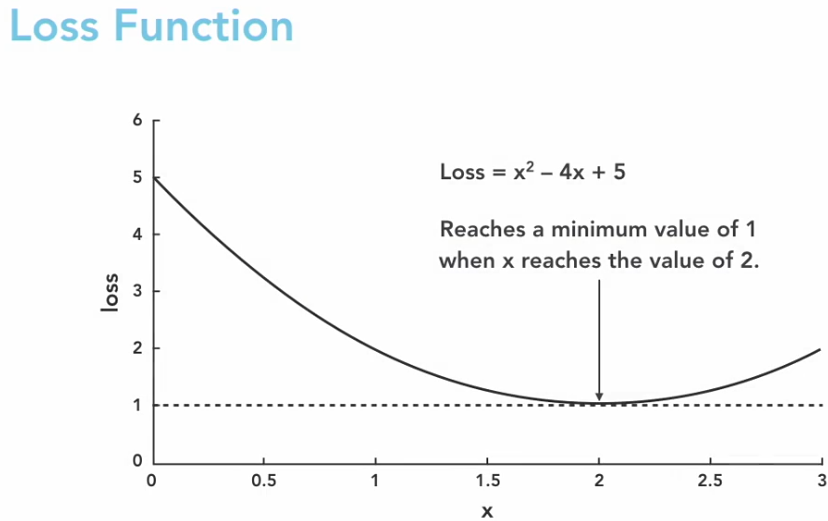

In [18]:
Image.open('Images/16-loss.png')

 As shown, the application has arrived at a value of X equal to about 1.944 and the value of loss equal to about 1.003. As I've illustrated at the beginning of the video, at the point of minimum loss, the value of X is two and the value of the loss is one, so you can see that the application did very well. This module has demonstrated how optimizers are used but it's not a really good example of TensorFlow training. 

---------